In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("./HEA dataset.xlsx")

In [21]:
df.head()

,Alloy,Al,Co,Cr,Fe,Ni,Cu,Mn,Ti,V,...,Y,Pd,Au,dHmix,dSmix,Atom.Size.Diff,Elect.Diff,VEC,Phases considered,Actual phase
0,Al0.5NbTaTiV,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.222222,...,0.0,0.0,0.0,-8.395062,13.145944,3.737505,0.049616,4.555556,BCC,BCC
1,Al0.75MoNbTiV,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.210526,...,0.0,0.0,0.0,-9.351801,13.332806,3.863332,0.232765,4.684211,BCC,BCC
2,Al0.25MoNbTiV,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.235294,...,0.0,0.0,0.0,-4.041522,12.708370,4.003399,0.243217,4.882353,BCC,BCC
3,Al0.25NbTaTiV,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.235294,...,0.0,0.0,0.0,-4.816609,12.708370,3.832440,0.050176,4.647059,BCC,BCC
4,Al0.2MoTaTiV,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.238095,0.238095,...,0.0,0.0,0.0,-3.356009,12.569175,4.017794,0.244333,4.904762,BCC,BCC


In [23]:
df.tail()

,Alloy,Al,Co,Cr,Fe,Ni,Cu,Mn,Ti,V,...,Y,Pd,Au,dHmix,dSmix,Atom.Size.Diff,Elect.Diff,VEC,Phases considered,Actual phase
1195,CuAlNiCoCrFeSi,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.0,...,0.0,0.0,0.0,-18.857143,16.175479,6.125836,0.115846,7.285714,IM,FCC+IM
1196,NbCrFeMnCoNi,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667,0.000000,0.0,...,0.0,0.0,0.0,-12.000000,14.894094,5.494631,0.140643,7.500000,IM,BCC+IM
1197,TiCrFeMnCoNi,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667,0.166667,0.0,...,0.0,0.0,0.0,-13.444444,14.894094,6.292753,0.151813,7.333333,IM,FCC+L12
1198,Ti2CrCuFeCoNi,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.000000,0.285714,0.0,...,0.0,0.0,0.0,-14.040816,14.529244,7.240603,0.154774,7.428571,IM,FCC+L12
1199,Co20Mn20Fe20Ni40,0.000000,0.200000,0.000000,0.200000,0.400000,0.000000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,-4.160000,11.070000,3.290000,0.136100,8.800000,FCC,FCC


In [25]:
df.columns

Index(['Alloy ', 'Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Mn', 'Ti', 'V', 'Nb',
       'Mo', 'Zr', 'Hf', 'Ta', 'W', 'C', 'Mg', 'Zn', 'Si', 'Re', 'N', 'Li',
       'Sn', 'Be', 'B', 'Ag', 'Pt', 'Y', 'Pd', 'Au', 'dHmix', 'dSmix',
       'Atom.Size.Diff', 'Elect.Diff', 'VEC', 'Phases considered',
       'Actual phase'],
      dtype='object')

In [29]:
myData=df.drop(["Alloy ","Actual phase"],axis=1)
myData.columns

Index(['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Mn', 'Ti', 'V', 'Nb', 'Mo', 'Zr',
       'Hf', 'Ta', 'W', 'C', 'Mg', 'Zn', 'Si', 'Re', 'N', 'Li', 'Sn', 'Be',
       'B', 'Ag', 'Pt', 'Y', 'Pd', 'Au', 'dHmix', 'dSmix', 'Atom.Size.Diff',
       'Elect.Diff', 'VEC', 'Phases considered'],
      dtype='object')

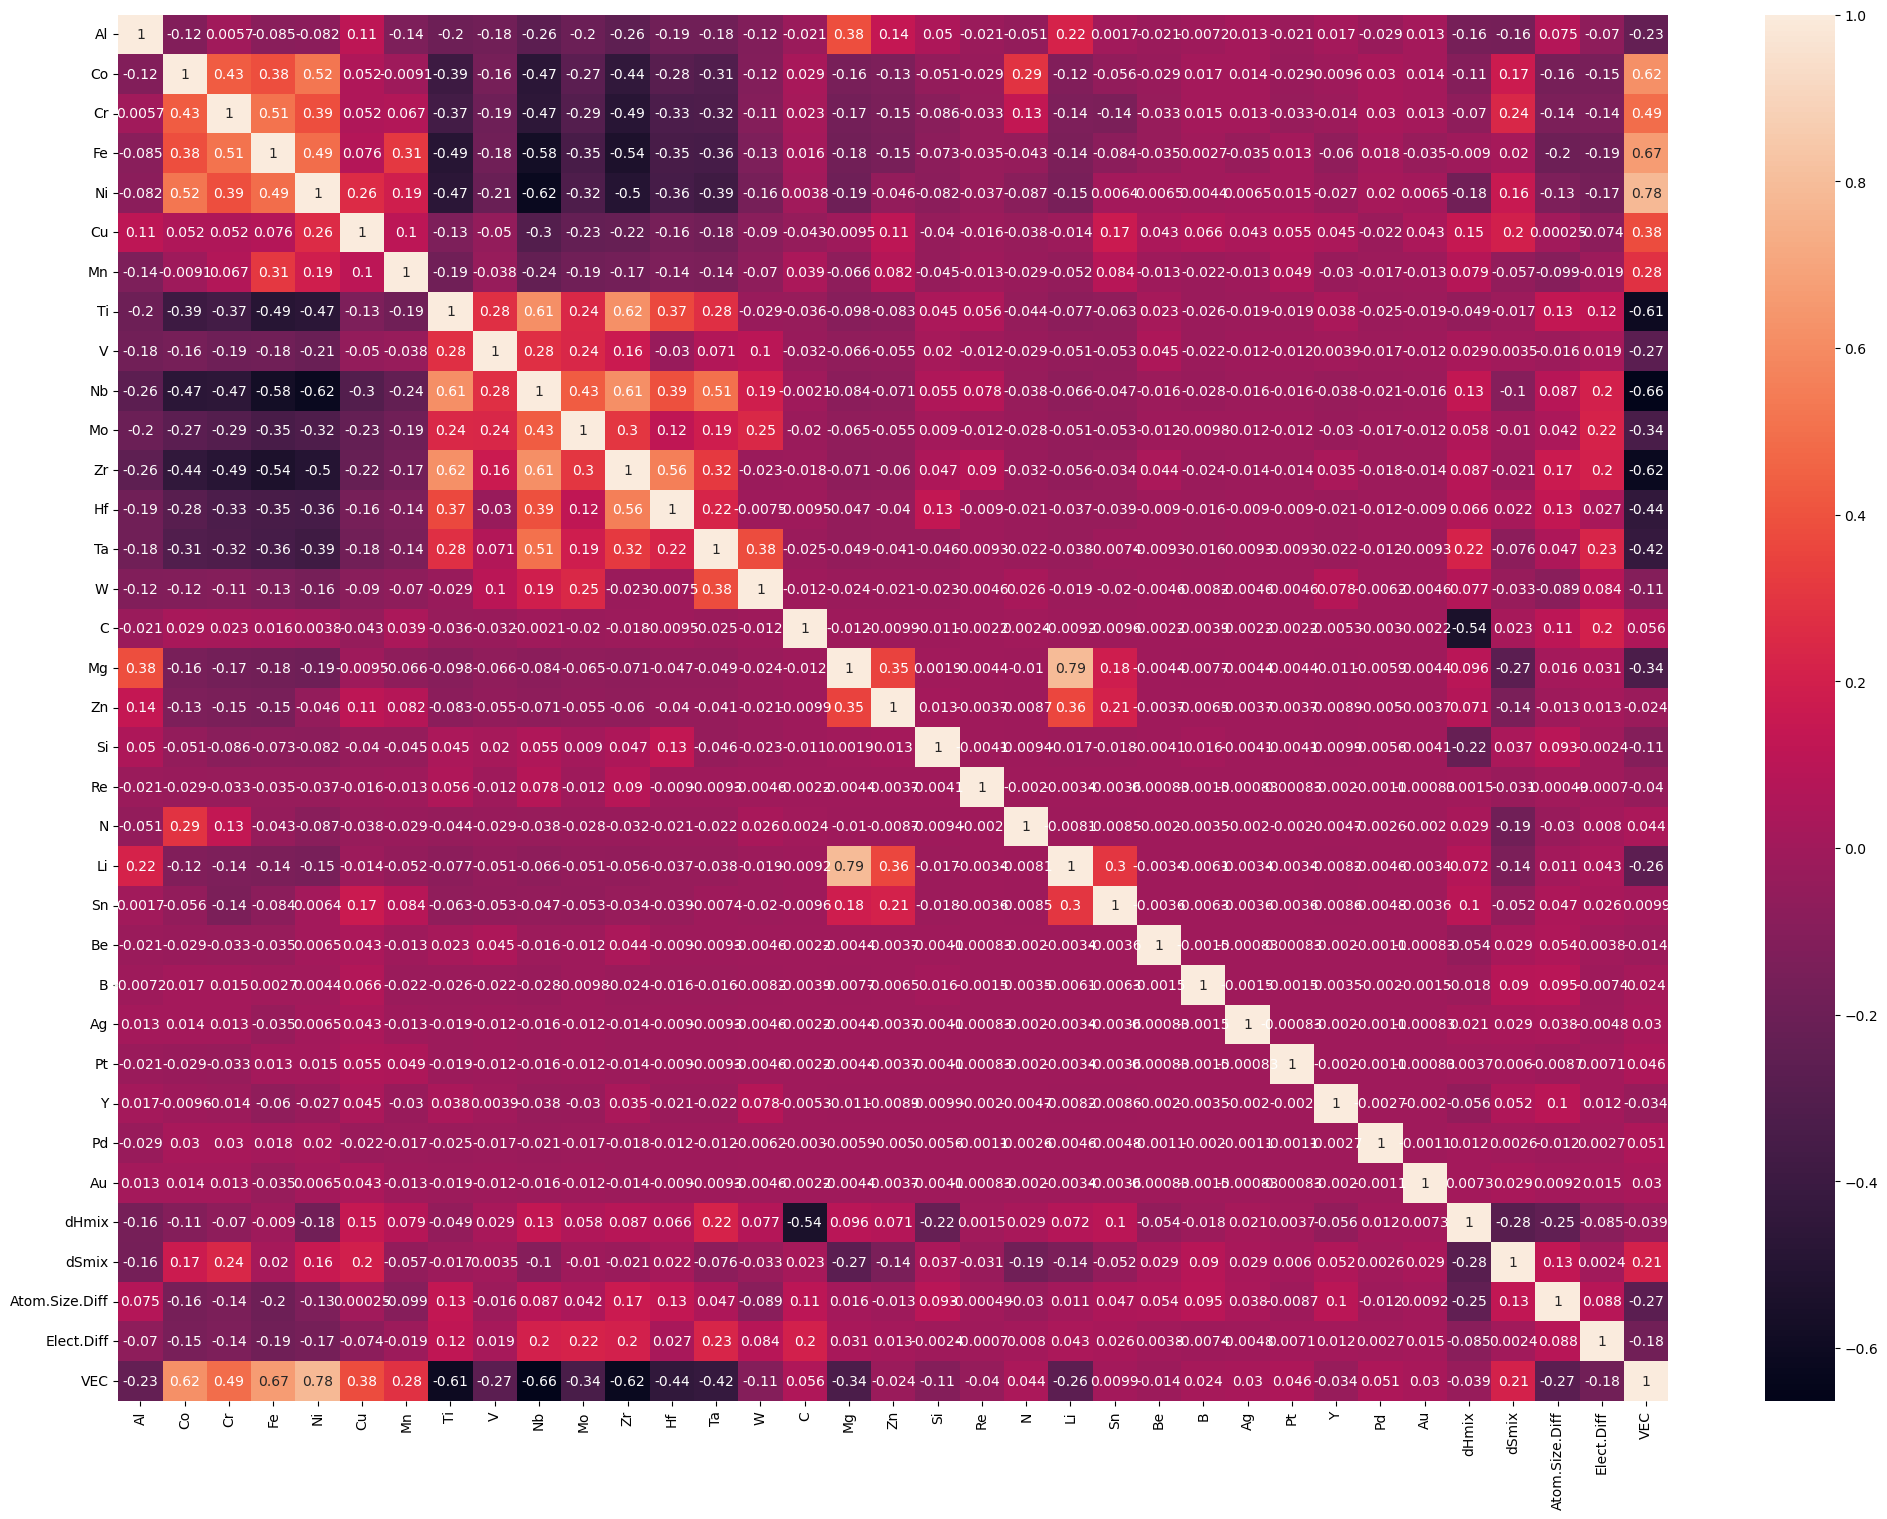

In [41]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Create a new DataFrame with only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix for only the numeric columns
plt.figure(figsize=(25, 18))
# print(numeric_df.corr())
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [35]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['Alloy ', 'Phases considered', 'Actual phase'], dtype='object')

## Logistic Regression

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [45]:
myData.head()

,Al,Co,Cr,Fe,Ni,Cu,Mn,Ti,V,Nb,...,Pt,Y,Pd,Au,dHmix,dSmix,Atom.Size.Diff,Elect.Diff,VEC,Phases considered
0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.222222,0.222222,...,0.0,0.0,0.0,0.0,-8.395062,13.145944,3.737505,0.049616,4.555556,BCC
1,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.210526,0.210526,...,0.0,0.0,0.0,0.0,-9.351801,13.332806,3.863332,0.232765,4.684211,BCC
2,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.235294,0.235294,...,0.0,0.0,0.0,0.0,-4.041522,12.708370,4.003399,0.243217,4.882353,BCC
3,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.235294,0.235294,...,0.0,0.0,0.0,0.0,-4.816609,12.708370,3.832440,0.050176,4.647059,BCC
4,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.238095,0.238095,0.000000,...,0.0,0.0,0.0,0.0,-3.356009,12.569175,4.017794,0.244333,4.904762,BCC


In [49]:
myData.columns

Index(['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Mn', 'Ti', 'V', 'Nb', 'Mo', 'Zr',
       'Hf', 'Ta', 'W', 'C', 'Mg', 'Zn', 'Si', 'Re', 'N', 'Li', 'Sn', 'Be',
       'B', 'Ag', 'Pt', 'Y', 'Pd', 'Au', 'dHmix', 'dSmix', 'Atom.Size.Diff',
       'Elect.Diff', 'VEC', 'Phases considered'],
      dtype='object')

In [51]:
myData.drop(["Phases considered"],axis=1)

,Al,Co,Cr,Fe,Ni,Cu,Mn,Ti,V,Nb,...,Ag,Pt,Y,Pd,Au,dHmix,dSmix,Atom.Size.Diff,Elect.Diff,VEC
0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,-8.395062,13.145944,3.737505,0.049616,4.555556
1,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526,0.210526,0.210526,...,0.0,0.0,0.0,0.0,0.0,-9.351801,13.332806,3.863332,0.232765,4.684211
2,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.235294,0.235294,...,0.0,0.0,0.0,0.0,0.0,-4.041522,12.708370,4.003399,0.243217,4.882353
3,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.235294,0.235294,...,0.0,0.0,0.0,0.0,0.0,-4.816609,12.708370,3.832440,0.050176,4.647059
4,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.238095,0.000000,...,0.0,0.0,0.0,0.0,0.0,-3.356009,12.569175,4.017794,0.244333,4.904762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-18.857143,16.175479,6.125836,0.115846,7.285714
1196,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,...,0.0,0.0,0.0,0.0,0.0,-12.000000,14.894094,5.494631,0.140643,7.500000
1197,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-13.444444,14.894094,6.292753,0.151813,7.333333
1198,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.000000,0.285714,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-14.040816,14.529244,7.240603,0.154774,7.428571


In [53]:
x=myData.drop(["Phases considered"],axis=1)
y = myData["Phases considered"]

In [57]:
y

0    BCC
1    BCC
2    BCC
3    BCC
4    BCC
Name: Phases considered, dtype: object

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

522         FCC
213          IM
120         BCC
917         BCC
1067         IM
         ...   
1044        FCC
1095        FCC
1130        BCC
860     FCC_BCC
1126        BCC
Name: Phases considered, Length: 840, dtype: object

In [61]:
## scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [95]:
logistModel = LogisticRegression(solver="liblinear",max_iter=10000)
logistModel.fit(x_train, y_train.values)

LogisticRegression(max_iter=10000, solver='liblinear')

In [97]:
y_pred = logistModel.predict(x_test)
print("Logistic Regression Accuracy:", 100*accuracy_score(y_test, y_pred), "%")

Logistic Regression Accuracy: 60.83333333333333 %


## SVM Classifiaction


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [21]:
svmModel = SVC(kernel="linear",) #{'poly', 'linear', 'sigmoid', 'rbf', 'precomputed'}
svmModel.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = svmModel.predict(x_test)
print("SVM Classifiaction Accuracy:", 100*accuracy_score(y_test, y_pred), "%")
print("Classification report:", classification_report(y_test, y_pred))

SVM Classifiaction Accuracy: 62.77777777777778 %
Classification report:               precision    recall  f1-score   support

         BCC       0.79      0.63      0.70       111
         FCC       0.60      0.66      0.63        67
     FCC_BCC       0.54      0.42      0.47        48
          IM       0.57      0.69      0.62       134

    accuracy                           0.63       360
   macro avg       0.63      0.60      0.61       360
weighted avg       0.64      0.63      0.63       360



## Random Forest Classification

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rforestmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rforestmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rforestmodel.predict(x_test)
print("Random Forest Classifiaction Accuracy:", 100*accuracy_score(y_test, y_pred), "%")

Random Forest Classifiaction Accuracy: 80.0 %


## Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gboostmodel = GradientBoostingClassifier(n_estimators=100, random_state=42)
gboostmodel.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [30]:
y_pred=gboostmodel.predict(x_test)
print("Gradient Boosting Classifiaction Accuracy:", 100*accuracy_score(y_test, y_pred), "%")

Gradient Boosting Classifiaction Accuracy: 77.5 %


## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knnmodel = KNeighborsClassifier(n_neighbors=4)
knnmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
y_pred=knnmodel.predict(x_test)
print("KNN Classifiaction Accuracy:", 100*accuracy_score(y_test, y_pred), "%")

KNN Classifiaction Accuracy: 67.22222222222223 %


In [35]:
# Finding out the best n_neighbors 
best_n_neighbors = 1
max_accuracy = 0

for n_neighbors in range(1, 50):  # Try neighbors from 1 to 50
    knnmodel = KNeighborsClassifier(n_neighbors=n_neighbors)
    knnmodel.fit(x_train, y_train)
    y_pred = knnmodel.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f"KNN Classification Accuracy: {max_accuracy * 100:.2f}%")
print(f"Best n_neighbors: {best_n_neighbors}")

KNN Classification Accuracy: 67.22%
Best n_neighbors: 4


## Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nbModel = GaussianNB(var_smoothing=0.09)
nbModel.fit(x_train, y_train)

GaussianNB(var_smoothing=0.09)

In [39]:
y_pred=nbModel.predict(x_test)
print(f"Naive Bayes Classification Accuracy: {accuracy_score(y_test,y_pred) * 100:.2f}%")

Naive Bayes Classification Accuracy: 58.33%


## Dicision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtreeModel = DecisionTreeClassifier(random_state=42)
dtreeModel.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred=dtreeModel.predict(x_test)
print(f"Dicision Tree Classification Accuracy: {accuracy_score(y_test,y_pred) * 100:.2f}%")

Dicision Tree Classification Accuracy: 71.94%


## AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
adaboostModel = AdaBoostClassifier(n_estimators=1000, random_state=42)
adaboostModel.fit(x_train,y_train)
y_pred=adaboostModel.predict(x_test)
print(f"Dicision Tree Classification Accuracy: {accuracy_score(y_test,y_pred) * 100:.2f}%")

C:\Users\sapta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Dicision Tree Classification Accuracy: 53.89%


## LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(x_train,y_train)
y_pred=ldaModel.predict(x_test)
print(f"LDA Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}% ")

LDA Accuracy: 63.89% 


## Extra Trees Classifier

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
etModel = ExtraTreesClassifier(n_estimators=100, random_state=42)
etModel.fit(x_train,y_train)
y_pred=etModel.predict(x_test)
print(f"LDA Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}% ")

LDA Accuracy: 79.17% 


## Final Verdict

In [54]:
models = {
    "Random Forest": rforestmodel,
    "Extra trees classifier": etModel,
    "Gradient Boosting": gboostmodel,
    "Decision Tree": dtreeModel,
    "LDA classifier": ldaModel,
    "SVM classification": svmModel,
    "KNN Classifiaction": knnmodel,
    "Logistic regression": logistModel,
    "Naive Bayes Classification": nbModel,
    "AdaBoost": adaboostModel,
}

for name, model in models.items():
    print(f"{name}: {accuracy_score(y_test, model.predict(x_test)) * 100:.2f}%")

Random Forest: 80.00%
Extra trees classifier: 79.17%
Gradient Boosting: 77.50%
Decision Tree: 71.94%
LDA classifier: 63.89%
SVM classification: 62.78%
KNN Classifiaction: 61.94%
Logistic regression: 60.83%
Naive Bayes Classification: 58.33%
AdaBoost: 53.89%


In [55]:
# Write your codes here